# Embeddings ... and word embeddings

Modeling text may not be as obvious as modeling images or audio. 

In images, inputs are a collection of pixels. In audio, it can be the vector obtained from a spectrogram (i.e. Fourier transform through time). Both representations share a common feature. Both are dense. 

When we consider the problem of natural language processing (NLP), things differ a little. 

Let us first check on the most simple representation of language. In particular, document representation.


## 1. Document representation

In text classification for example, we are given a description $x \in {\bf R}^d$ of a document $\delta$ and a fixed set of classes $y \in \{c_1, \dots, c_K\}$, for example the document topic. Given a new document, our goal is to predict the most probable class.

A very simple description of a document is the **bag-of-words** description. This representation transforms a complete text to a vector of $d$ predefined words. The set of predefined words is selected by the practicioner. For example, the list can consist of the set of all words in a given language. 

<b>Example 1:</b>
Suppose we are given four different documents belonging to the topics $y=\{\text{'economics'},\text{'technology'}\}$ and we select as our representation the following bag-of-words $x = \{\text{'market'}, \text{'stock'}, \text{'price'}, \text{'application'}, \text{'mobile'}, \text{'google'}\}$. We can count the number of times a certain term appears in that document and expect that this description is discriminative enough for identifying the document topic. Check the following example:

<table border="1">
<tr>
<td></td>
<td>market</td>
<td>stock</td>
<td>price</td>
<td>application</td>
<td>mobile</td>
<td>google</td>
</tr>
<tr>
<td>document 1($\text{'economics'}$)</td>
<td>1</td>
<td>2</td>
<td>3</td>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>
<tr>
<td>document 2($\text{'economics'}$)</td>
<td>0</td>
<td>1</td>
<td>2</td>
<td>0</td>
<td>0</td>
<td>1</td>
</tr>
<tr>
<td>document 3($\text{'technology'}$)</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>2</td>
<td>3</td>
<td>1</td>
</tr>
<tr>
<td>document 4($\text{'technology'}$)</td>
<td>1</td>
<td>0</td>
<td>1</td>
<td>2</td>
<td>3</td>
<td>0</td>
</tr>
</table>

In this representation, document 2 is represented by the vector (0,1,2,0,0,1). We can alternatively use a binary value representing whether a term appears or not in the document. In this last case document would be represesnted by (0,1,1,0,0,1).

Observe that this is a context free representation, i.e. the order of the words is not considered. Consider the sentences "Google reduces the prices of applications in App market" and "The number of aplications in Google App market with cheap prices is reduced by 20%". The representation for both sentences is the same, though the exact meaning of both sentences is completely different. However, this kind of representation may be enough for identifying that both refers to $\text{'technology'}$.

<div class = "alert alert-info" style = "border-radius:10px"> **NOTE: ** From a classification point of view, these representations convey very different meaning. In the case of word counting we are expecting the classification method con consider the exact appearance number of words of relevant. In some sense, we could say we are looking for a model that classify the text . For example, if we use a naive bayes approach we could look for the probability of generating the first word, then the second, etc. This will be consistent with the fact that we are considering the multiplicity of that word. This representation can be regarded as *multinomial representation*. On the other hand, if we use a binary representation, the meaning of this is very different. We are considering the words that appear in the document. But, the not appearance of a certain word is also important and, or interesting. In this case document 3 in the former example is characterized by the apearance of `application`, `mobile`, and `google`. But also by the not appearance of `market`, `stock`, and `price`.</div>

## 2. Word embeddings

A different approach for working with NLP is considering the embedding of single words, i.e. looking for a manifold where semantically similar words are mapped to nearby points. These are called vector space models.

The term `word embedding` was introduced by Bengio et al. at the begining of the 2000's. However it was Mikolov et al. in 2013 with the creation of **word2vec** who popularized word embeddings. From then, different word embeddings using deep learning appeared. It is worth mentioning **GloVe** from Pennington et al. (2014).


The term embedding naturally appears in any deep architecture where there is a bottleneck layer. The output of that bottleneck layer can be seen as low-dimensional embedding. This idea lies at the core of deep learning, and we have seen that before in the unsupervised notebook.

In this sense we can easily distinguish among task-oriented embeddings and general purpose embeddings:
+ Task oriented embeddings has the *Embedding layer* a one of the layers for a different task. This is, while solving the problem at hand, one also learns a suitable embedding for that task.

+ General purpose embeddings are designed to be used or transferred across different tasks.



## 3. A disection of the Embedding layer

Contrary to other embeddings, such as the ones we found in the image domain, the word embedding layer usually regarded as a mapping from a discrete set of objects (words) to a real valued vector, i.e. 

$$k\in\{1..N\} \rightarrow \mathbb{R}^d$$

Thus, we can represent the *Embedding layer* as $N\times d$ matrix, or just a table/dictionary.

$$
\begin{matrix}
word1: \\
word2:\\
\vdots\\
wordN: \\
\end{matrix}
\left[
\begin{matrix}
x_{1,1}&x_{1,2}& \dots &x_{1,d}\\
x_{2,1}&x_{2,2}& \dots &x_{2,d}\\
\vdots&&\\
x_{N,1}&x_{N,2}& \dots &x_{N,d}\\
\end{matrix}
\right]
$$

In this sense, the basic operation that an embedding layer has to accomplish is that given a certain word it returns the assigned code. And the goal in learning is to learn the values in the matrix.

In the learning process the matrix is initialized at random and learned using standard learning procedures, such as backpropagation.

## 4. Learning general purpose word embeddings

In this section, we are going to check two of the most well known strategies for learning general purpose embeddings, namely CBOW and Skip-gram.

The idea behind both methods is simple, the context around a word is a hint with respect the underlying semantic of that word, i.e. if we find the same context around the target words in different sentences but those words are different, most probably they convey the same meaning.

Strictly following this idea, we can define **CBOW** (Continuous Bag-of-Words): Given the context of a word, i.e. the $k$ words around the target, we want to infer what the target word is.


We can however change this order, and this will gives us the **Skip-gram**. In the skip-gram, given one word, we want to predict its context.

## 5. Coding a skip-gram model

<small>This code is based on the word2vec example from Udacity.</small>

In [1]:
%matplotlib inline
from __future__ import print_function
import collections
import math
import numpy as np
import os
import random
import tensorflow as tf
import zipfile
from matplotlib import pylab
from six.moves import range
from six.moves.urllib.request import urlretrieve
from sklearn.manifold import TSNE

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [12]:
url = 'http://mattmahoney.net/dc/'

def maybe_download(filename, expected_bytes):
  """Download a file if not present, and make sure it's the right size."""
  if not os.path.exists(filename):
    filename, _ = urlretrieve(url + filename, filename)
  statinfo = os.stat(filename)
  if statinfo.st_size == expected_bytes:
    print('Found and verified %s' % filename)
  else:
    print(statinfo.st_size)
    raise Exception(
      'Failed to verify ' + filename + '. Can you get to it with a browser?')
  return filename

filename = maybe_download('text8.zip', 31344016)

Found and verified text8.zip


In [3]:
def read_data(filename):
    """Extract the first file enclosed in a zip file as a list of words"""
    with zipfile.ZipFile(filename) as f:
        data = tf.compat.as_str(f.read(f.namelist()[0])).split()
    return data
  
words = read_data(filename)
print('Data size %d' % len(words))

Data size 17005207


In [4]:
vocabulary_size = 50000

def build_dataset(words):
  count = [['UNK', -1]]
  count.extend(collections.Counter(words).most_common(vocabulary_size - 1))
  dictionary = dict()
  for word, _ in count:
    dictionary[word] = len(dictionary)
  data = list()
  unk_count = 0
  for word in words:
    if word in dictionary:
      index = dictionary[word]
    else:
      index = 0  # dictionary['UNK']
      unk_count = unk_count + 1
    data.append(index)
  count[0][1] = unk_count
  reverse_dictionary = dict(zip(dictionary.values(), dictionary.keys())) 
  return data, count, dictionary, reverse_dictionary

data, count, dictionary, reverse_dictionary = build_dataset(words)
print('Most common words (+UNK)', count[:5])
print('Sample data', data[:10])
del words  # Hint to reduce memory.

Most common words (+UNK) [['UNK', 418391], ('the', 1061396), ('of', 593677), ('and', 416629), ('one', 411764)]
Sample data [5239, 3084, 12, 6, 195, 2, 3137, 46, 59, 156]


In [5]:
data_index = 0

def generate_batch(batch_size, num_skips, skip_window):
  global data_index
  assert batch_size % num_skips == 0
  assert num_skips <= 2 * skip_window
  batch = np.ndarray(shape=(batch_size), dtype=np.int32)
  labels = np.ndarray(shape=(batch_size, 1), dtype=np.int32)
  span = 2 * skip_window + 1 # [ skip_window target skip_window ]
  buffer = collections.deque(maxlen=span)
  for _ in range(span):
    buffer.append(data[data_index])
    data_index = (data_index + 1) % len(data)
  for i in range(batch_size // num_skips):
    target = skip_window  # target label at the center of the buffer
    targets_to_avoid = [ skip_window ]
    for j in range(num_skips):
      while target in targets_to_avoid:
        target = random.randint(0, span - 1)
      targets_to_avoid.append(target)
      batch[i * num_skips + j] = buffer[skip_window]
      labels[i * num_skips + j, 0] = buffer[target]
    buffer.append(data[data_index])
    data_index = (data_index + 1) % len(data)
  return batch, labels

print('data:', [reverse_dictionary[di] for di in data[:8]])

for num_skips, skip_window in [(2, 1), (4, 2)]:
    data_index = 0
    batch, labels = generate_batch(batch_size=8, num_skips=num_skips, skip_window=skip_window)
    print('\nwith num_skips = %d and skip_window = %d:' % (num_skips, skip_window))
    print('    batch:', [reverse_dictionary[bi] for bi in batch])
    print('    labels:', [reverse_dictionary[li] for li in labels.reshape(8)])

data: ['anarchism', 'originated', 'as', 'a', 'term', 'of', 'abuse', 'first']

with num_skips = 2 and skip_window = 1:
    batch: ['originated', 'originated', 'as', 'as', 'a', 'a', 'term', 'term']
    labels: ['as', 'anarchism', 'originated', 'a', 'term', 'as', 'a', 'of']

with num_skips = 4 and skip_window = 2:
    batch: ['as', 'as', 'as', 'as', 'a', 'a', 'a', 'a']
    labels: ['originated', 'a', 'term', 'anarchism', 'originated', 'term', 'as', 'of']


In [6]:
batch_size = 128
embedding_size = 128 # Dimension of the embedding vector.
skip_window = 1 # How many words to consider left and right.
num_skips = 2 # How many times to reuse an input to generate a label.
# We pick a random validation set to sample nearest neighbors. here we limit the
# validation samples to the words that have a low numeric ID, which by
# construction are also the most frequent. 
valid_size = 16 # Random set of words to evaluate similarity on.
valid_window = 100 # Only pick dev samples in the head of the distribution.
valid_examples = np.array(random.sample(range(valid_window), valid_size))
num_sampled = 64 # Number of negative examples to sample.

graph = tf.Graph()

with graph.as_default(), tf.device('/cpu:0'):

  # Input data.
  train_dataset = tf.placeholder(tf.int32, shape=[batch_size])
  train_labels = tf.placeholder(tf.int32, shape=[batch_size, 1])
  valid_dataset = tf.constant(valid_examples, dtype=tf.int32)
  
  # Variables.
  embeddings = tf.Variable(tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0))
  softmax_weights = tf.Variable(tf.truncated_normal([vocabulary_size, embedding_size],stddev=1.0 / math.sqrt(embedding_size)))
  softmax_biases = tf.Variable(tf.zeros([vocabulary_size]))
  
  # Model.
  # Look up embeddings for inputs.
  embed = tf.nn.embedding_lookup(embeddings, train_dataset)
  # Compute the softmax loss, using a sample of the negative labels each time.
  loss = tf.reduce_mean(
    tf.nn.sampled_softmax_loss(softmax_weights, softmax_biases, embed,
                               train_labels, num_sampled, vocabulary_size))

  # Optimizer.
  # Note: The optimizer will optimize the softmax_weights AND the embeddings.
  # This is because the embeddings are defined as a variable quantity and the
  # optimizer's `minimize` method will by default modify all variable quantities 
  # that contribute to the tensor it is passed.
  # See docs on `tf.train.Optimizer.minimize()` for more details.
  optimizer = tf.train.AdagradOptimizer(1.0).minimize(loss)
  
  # Compute the similarity between minibatch examples and all embeddings.
  # We use the cosine distance:
  norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), 1, keep_dims=True))
  normalized_embeddings = embeddings / norm
  valid_embeddings = tf.nn.embedding_lookup(
    normalized_embeddings, valid_dataset)
  similarity = tf.matmul(valid_embeddings, tf.transpose(normalized_embeddings))

In [7]:
num_steps = 1000001

with tf.Session(graph=graph) as session:
  tf.initialize_all_variables().run()
  print('Initialized')
  average_loss = 0
  for step in range(num_steps):
    batch_data, batch_labels = generate_batch(
      batch_size, num_skips, skip_window)
    feed_dict = {train_dataset : batch_data, train_labels : batch_labels}
    _, l = session.run([optimizer, loss], feed_dict=feed_dict)
    average_loss += l
    if step % 2000 == 0:
      if step > 0:
        average_loss = average_loss / 2000
      # The average loss is an estimate of the loss over the last 2000 batches.
      print('Average loss at step %d: %f' % (step, average_loss))
      average_loss = 0
    # note that this is expensive (~20% slowdown if computed every 500 steps)
    if step % 10000 == 0:
      sim = similarity.eval()
      for i in range(valid_size):
        valid_word = reverse_dictionary[valid_examples[i]]
        top_k = 8 # number of nearest neighbors
        nearest = (-sim[i, :]).argsort()[1:top_k+1]
        log = 'Nearest to %s:' % valid_word
        for k in range(top_k):
          close_word = reverse_dictionary[nearest[k]]
          log = '%s %s,' % (log, close_word)
        print(log)
  final_embeddings = normalized_embeddings.eval()

Initialized
Average loss at step 0: 8.043100
Nearest to this: reichstag, chapelle, ruskin, clog, chronos, knud, poorer, wickets,
Nearest to more: libra, carinthia, unpaired, gunman, linebacker, spaulding, landscaping, detonate,
Nearest to system: storks, mau, democratically, owing, reeve, lead, calculations, cents,
Nearest to his: irritability, morin, publically, dowling, munster, stabbing, cjd, thoroughbreds,
Nearest to while: musab, samba, jamming, revolution, winch, tourist, assault, brewery,
Nearest to after: inserting, chrysotile, umno, unconsciously, vaccination, suing, streamline, goldoni,
Nearest to by: contingency, mudslides, notch, tears, operation, iqaluit, liberalize, platt,
Nearest to has: medium, braudel, cutting, tabasco, abilities, fabulous, moi, camelids,
Nearest to six: plumbing, dominance, participants, valentine, dredd, szlachta, branagh, latitude,
Nearest to seven: hortense, vibration, loach, maiden, furnish, clinching, examined, dhaka,
Nearest to only: herds, jury

Let us save the embedding for later use.

In [13]:
#### DUMP
#import pickle
#f = open('myembedding.pkl','wb')
#pickle.dump([final_embeddings,dictionary,reverse_dictionary],f)
#f.close()

In [14]:
num_points = 400

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
two_d_embeddings = tsne.fit_transform(final_embeddings[1:num_points+1, :])

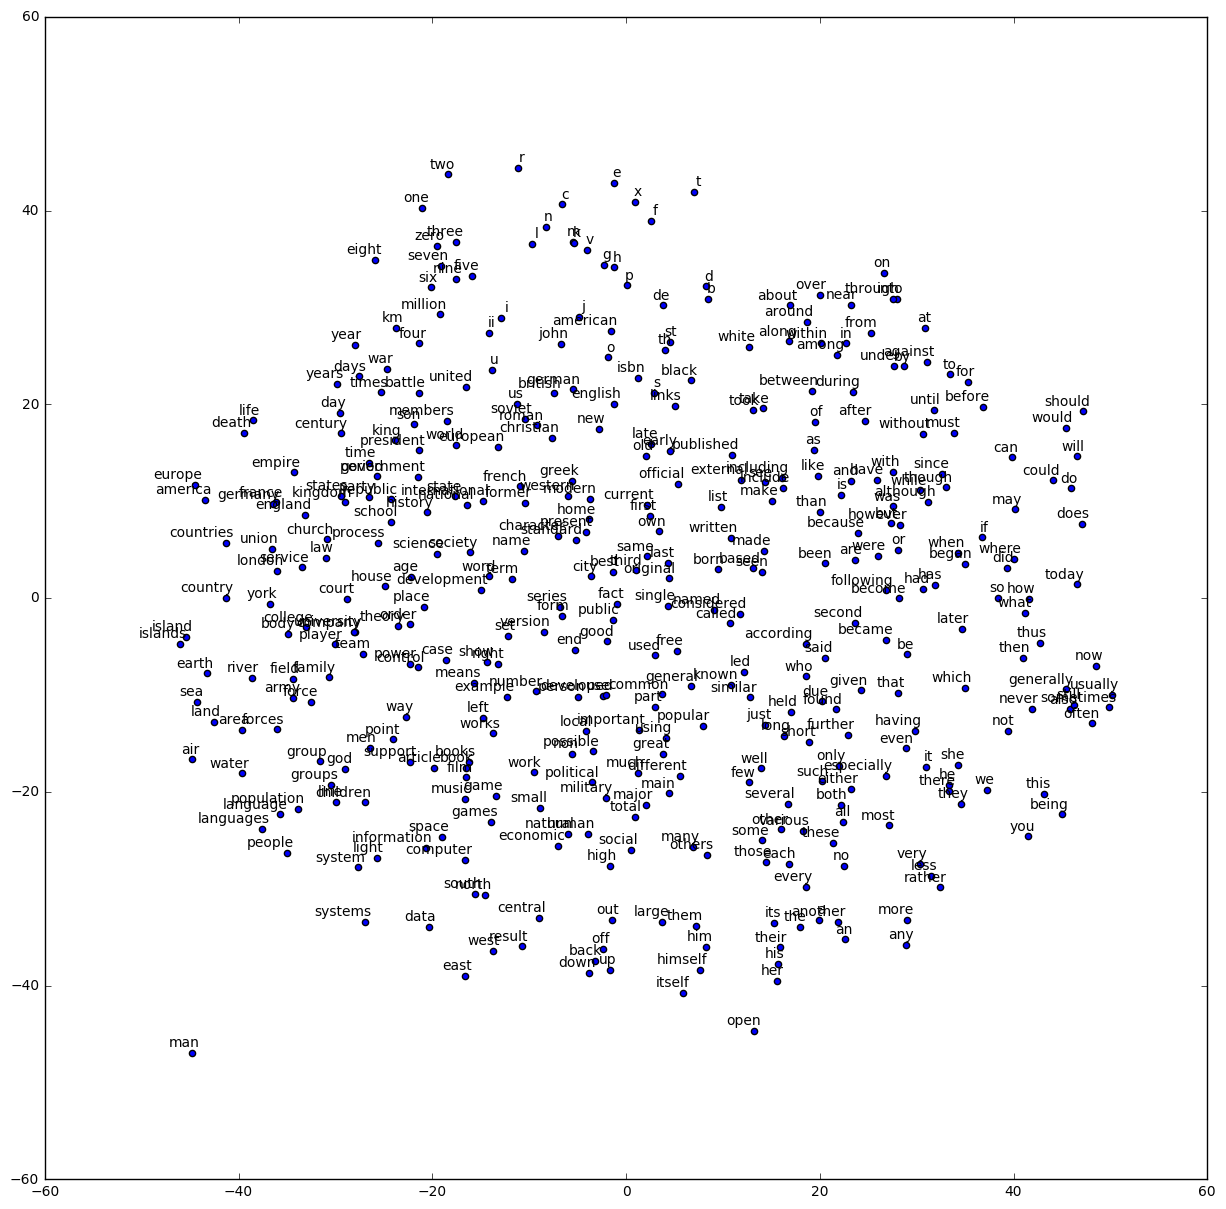

In [15]:
def plot(embeddings, labels):
  assert embeddings.shape[0] >= len(labels), 'More labels than embeddings'
  pylab.figure(figsize=(15,15))  # in inches
  for i, label in enumerate(labels):
    x, y = embeddings[i,:]
    pylab.scatter(x, y)
    pylab.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points',
                   ha='right', va='bottom')
  pylab.show()

words = [reverse_dictionary[i] for i in range(1, num_points+1)]
plot(two_d_embeddings, words)

## 6. Understanding and using the embedding.

In the former code we have the `dictionary` that converts from the word to an index, and the `reverse_dictionary` that given an index returns the corresponding word.

In [29]:
import pickle

f = open('./dataset/myembedding.pkl','rb')
fe,dic,rdic=pickle.load(f)
f.close()

In [30]:
dic['woman']

1014

In [31]:
rdic[42]

'but'

The embedding tries to put together words with similar meaning. A good embedding allows to semantically operate. Let us check some simple semantical operations:

In [32]:
result = (fe[dic['two'],:]+ fe[dic['one'],:])

In [33]:
from scipy.spatial import distance
candidates=np.argsort(distance.cdist(fe,result[np.newaxis,:],metric="seuclidean"),axis=0)

for i in xrange(5):
    idx=candidates[i][0]
    print(rdic[idx])

two
one
three
four
five


We can also define word analogies: `football is to ? as foot is to hand`


In [40]:
result = (fe[dic['football'],:] - fe[dic['foot'],:] + fe[dic['hand'],:])

from scipy.spatial import distance
candidates=np.argsort(distance.cdist(fe,result[np.newaxis,:],metric="seuclidean"),axis=0)

for i in xrange(5):
    idx=candidates[i][0]
    print(rdic[idx])

football
basketball
baseball
sports
hand


In [43]:
result = (fe[dic['madrid'],:] - fe[dic['spain'],:] + fe[dic['germany'],:])

from scipy.spatial import distance
candidates=np.argsort(distance.cdist(fe,result[np.newaxis,:],metric="seuclidean"),axis=0)

for i in xrange(5):
    idx=candidates[i][0]
    print(rdic[idx])

madrid
germany
berlin
kathryn
rump


In [44]:
result = (fe[dic['barcelona'],:] - fe[dic['spain'],:] + fe[dic['germany'],:])

from scipy.spatial import distance
candidates=np.argsort(distance.cdist(fe,result[np.newaxis,:],metric="seuclidean"),axis=0)

for i in xrange(5):
    idx=candidates[i][0]
    print(rdic[idx])

barcelona
germany
munich
boziz
liverpool


Let us used a pretrained embedding. We will use a simple embedding detailed in `Improving Word Representations via Global Context and Multiple Word Prototypes`

In [46]:
import pandas as pd

df = pd.read_table("./dataset/wordVectors.txt",delimiter=" ",header=None)

embedding=df.values[:,:-1]

In [48]:
f = open("./dataset/vocab.txt",'r')
dictionary=dict()
for word in f.readlines():
    dictionary[word] = len(dictionary)
    
reverse_dictionary = dict(zip(dictionary.values(), dictionary.keys())) 

In [51]:
result = embedding[dictionary['king\n'],:]-embedding[dictionary['man\n'],:]+embedding[dictionary['girl\n'],:]
import numpy as np
from scipy.spatial import distance
candidates=np.argsort(distance.cdist(embedding,result[np.newaxis,:],metric="seuclidean"),axis=0)

for i in xrange(0,5):
    idx=candidates[i][0]
    print(reverse_dictionary[idx])

prince

king

princess

queen

bride



<div class = "alert alert-info" style="border-radius:10px">**EXERCISE: ** Toy with word embeddings by creating new analogies.</div>